# Markov Switching Auto Regressive Model

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

# Hamilton (1989) switching model of GNP

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     rgnp   No. Observations:                  131
Model:             MarkovAutoregression   Log Likelihood                -181.263
Date:                  Thu, 17 Sep 2020   AIC                            380.527
Time:                          12:10:54   BIC                            406.404
Sample:                      04-01-1951   HQIC                           391.042
                           - 10-01-1984                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3588      0.265     -1.356      0.175      -0.877       0.160
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1635      0.075     15.614      0.000       1.017       1.310
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5914      0.103      5.761      0.000       0.390       0.793
ar.L1          0.0135      0.120      0.112      0.911      -0.222       0.249
ar.L2         -0.0575      0.138     -0.418      0.676      -0.327       0.212
ar.L3         -0.2470      0.107     -2.310      0.021      -0.457      -0.037
ar.L4         -0.2129      0.111     -1.926      0.054      -0.430       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7547      0.097      7.819      0.000       0.565       0.944
p[1->0]        0.0959      0.038      2.542      0.011       0.022       0.170
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

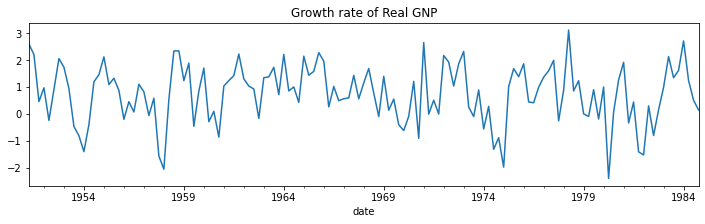

In [2]:
# Get the RGNP data to replicate Hamilton
dta = pd.read_stata('https://www.stata-press.com/data/r14/rgnp.dta').iloc[1:]
dta.index = pd.DatetimeIndex(dta.date, freq='QS')
dta_hamilton = dta.rgnp

# Plot the data
dta_hamilton.plot(title='Growth rate of Real GNP', figsize=(12,3))

# Fit the model
mod_hamilton = sm.tsa.MarkovAutoregression(dta_hamilton, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()

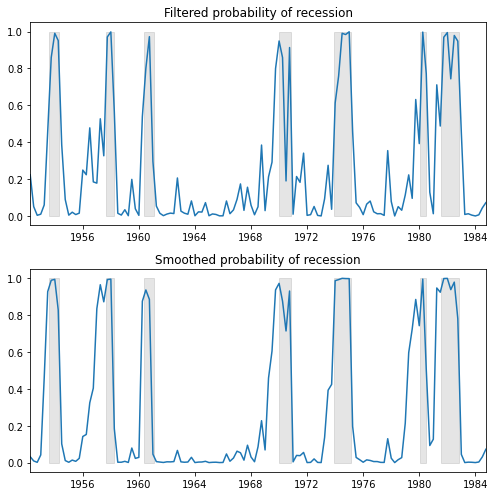

In [3]:
fig, axes = plt.subplots(2, figsize=(7,7))
ax = axes[0]
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec['USREC'].values, color='k', alpha=0.1)
ax.set_xlim(dta_hamilton.index[4], dta_hamilton.index[-1])
ax.set(title='Filtered probability of recession')

ax = axes[1]
ax.plot(res_hamilton.smoothed_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec['USREC'].values, color='k', alpha=0.1)
ax.set_xlim(dta_hamilton.index[4], dta_hamilton.index[-1])
ax.set(title='Smoothed probability of recession')

fig.tight_layout()

In [4]:
print(res_hamilton.expected_durations)

[ 4.07604746 10.42589383]


# Kim, Nelson, and Startz (1998) Three-state Variance Switching


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      0   No. Observations:                  732
Model:               MarkovRegression   Log Likelihood                1001.895
Date:                Thu, 17 Sep 2020   AIC                          -1985.790
Time:                        12:11:00   BIC                          -1944.428
Sample:                    01-01-1926   HQIC                         -1969.834
                         - 12-01-1986                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0012      0.000      7.136      0.000       0.001       0.002
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0040      0.000      8.489      0.000       0.003       0.005
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0311      0.006      5.461      0.000       0.020       0.042
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9747      0.000   7857.416      0.000       0.974       0.975
p[1->0]        0.0195      0.010      1.949      0.051      -0.000       0.039
p[2->0]     2.354e-08        nan        nan        nan         nan         nan
p[0->1]        0.0253   3.97e-05    637.835      0.000       0.025       0.025
p[1->1]        0.9688      0.013     75.528      0.000       0.944       0.994
p[2->1]        0.0493      0.032      1.551      0.121      -0.013       0.112
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

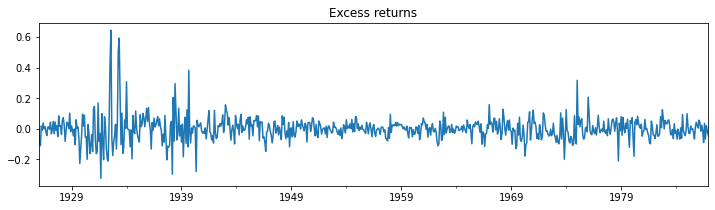

In [5]:
# Get the dataset
ew_excs = requests.get('http://econ.korea.ac.kr/~cjkim/MARKOV/data/ew_excs.prn').content
raw = pd.read_table(BytesIO(ew_excs), header=None, skipfooter=1, engine='python')
raw.index = pd.date_range('1926-01-01', '1995-12-01', freq='MS')

dta_kns = raw.loc[:'1986'] - raw.loc[:'1986'].mean()

# Plot the dataset
dta_kns[0].plot(title='Excess returns', figsize=(12, 3))

# Fit the model
mod_kns = sm.tsa.MarkovRegression(dta_kns, k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

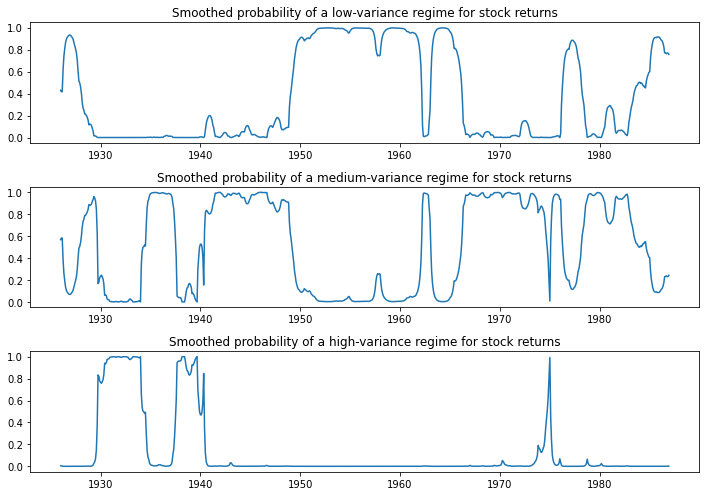

In [6]:
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')

ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')

ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')

fig.tight_layout()

# Filardo (1994) Time-Varying Transition Probabilities

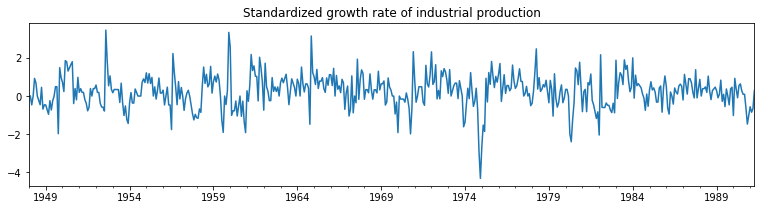

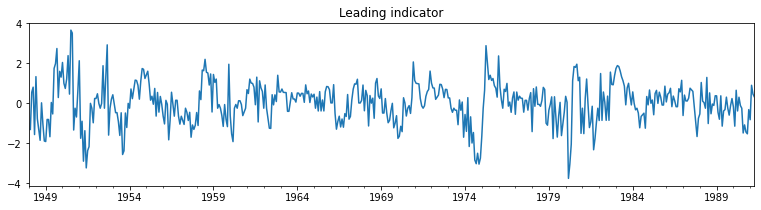

In [7]:
# Get the dataset
filardo = requests.get('http://econ.korea.ac.kr/~cjkim/MARKOV/data/filardo.prn').content
dta_filardo = pd.read_table(BytesIO(filardo), sep=' +', header=None, skipfooter=1, engine='python')
dta_filardo.columns = ['month', 'ip', 'leading']
dta_filardo.index = pd.date_range('1948-01-01', '1991-04-01', freq='MS')

dta_filardo['dlip'] = np.log(dta_filardo['ip']).diff()*100
# Deflated pre-1960 observations by ratio of std. devs.
# See hmt_tvp.opt or Filardo (1994) p. 302
std_ratio = dta_filardo['dlip']['1960-01-01':].std() / dta_filardo['dlip'][:'1959-12-01'].std()
dta_filardo['dlip'][:'1959-12-01'] = dta_filardo['dlip'][:'1959-12-01'] * std_ratio

dta_filardo['dlleading'] = np.log(dta_filardo['leading']).diff()*100
dta_filardo['dmdlleading'] = dta_filardo['dlleading'] - dta_filardo['dlleading'].mean()

# Plot the data
dta_filardo['dlip'].plot(title='Standardized growth rate of industrial production', figsize=(13,3))
plt.figure()
dta_filardo['dmdlleading'].plot(title='Leading indicator', figsize=(13,3));

In [8]:
mod_filardo = sm.tsa.MarkovAutoregression(
    dta_filardo.iloc[2:]['dlip'], k_regimes=2, order=4, switching_ar=False,
    exog_tvtp=sm.add_constant(dta_filardo.iloc[1:-1]['dmdlleading']))

np.random.seed(12345)
res_filardo = mod_filardo.fit(search_reps=20)
res_filardo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     dlip   No. Observations:                  514
Model:             MarkovAutoregression   Log Likelihood                -586.572
Date:                  Thu, 17 Sep 2020   AIC                           1195.144
Time:                          12:11:13   BIC                           1241.808
Sample:                      03-01-1948   HQIC                          1213.433
                           - 04-01-1991                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8659      0.153     -5.658      0.000      -1.166      -0.566
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5173      0.077      6.706      0.000       0.366       0.668
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4844      0.037     13.172      0.000       0.412       0.556
ar.L1          0.1895      0.050      3.761      0.000       0.091       0.288
ar.L2          0.0793      0.051      1.552      0.121      -0.021       0.180
ar.L3          0.1109      0.052      2.136      0.033       0.009       0.213
ar.L4          0.1223      0.051      2.418      0.016       0.023       0.221
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0     1.6494      0.446      3.702      0.000       0.776       2.523
p[1->0].tvtp0    -4.3595      0.747     -5.833      0.000      -5.824      -2.895
p[0->0].tvtp1    -0.9945      0.566     -1.758      0.079      -2.103       0.114
p[1->0].tvtp1    -1.7702      0.508     -3.484      0.000      -2.766      -0.775
=================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

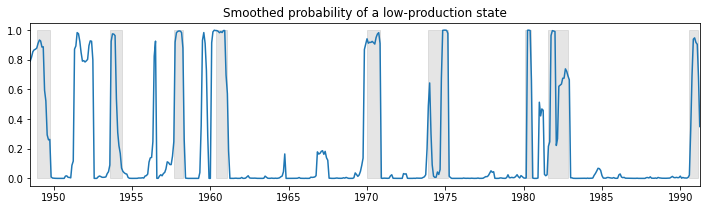

In [9]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(res_filardo.smoothed_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec['USREC'].values, color='gray', alpha=0.2)
ax.set_xlim(dta_filardo.index[6], dta_filardo.index[-1])
ax.set(title='Smoothed probability of a low-production state');

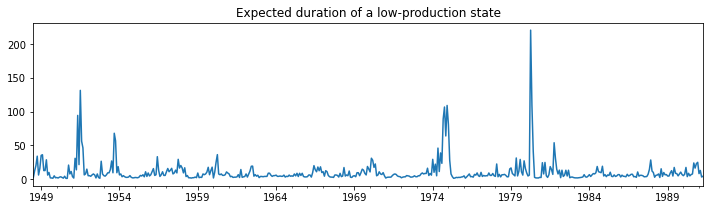

In [10]:
res_filardo.expected_durations[0].plot(
    title='Expected duration of a low-production state', figsize=(12,3));